In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
model_name = "sentence-transformers/all-MiniLM-L6-v2"
print(f"We'll use the model: {model_name}")

We'll use the model: sentence-transformers/all-MiniLM-L6-v2


In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

In [6]:
texts = [
    "Artificial intelligence is revolutionizing many fields.",
    "Deep learning models require large amounts of data.",
    "PyTorch is a popular framework for machine learning.",
    "Transformers have improved natural language processing significantly.",
    "Retrieval augmented generation enhances language models with external knowledge."
]

In [7]:
def get_embeddings(texts, tokenizer, model):
    encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**encoded_inputs)
    token_embeddings = outputs.last_hidden_state
    embeddings = torch.mean(token_embeddings, dim=1)
    return embeddings.cpu().numpy()

In [10]:
from sklearn.decomposition import PCA

In [23]:
embeddings = get_embeddings(texts, tokenizer, model)

In [24]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

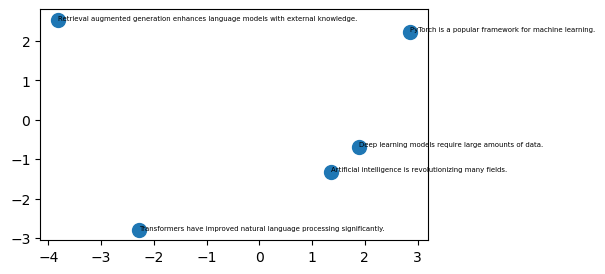

In [30]:
plt.figure(figsize=(5, 3))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o', s=100)
for i, text in enumerate(texts):
    plt.annotate(text,(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),fontsize =5)

# Vector database

In [31]:
vector_db = {
    "texts": texts,
    "embeddings": embeddings
}

In [32]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [33]:
query = "How does PyTorch help with machine learning?"

In [34]:
query_embedding = get_embeddings([query], tokenizer, model)[0]

In [35]:
similarities = []
for i, doc_embeddings in enumerate(vector_db["embeddings"]):
    similarity = cosine_similarity(query_embedding, doc_embeddings)
    similarities.append((i, similarity, vector_db["texts"][i]))

In [36]:
similarities.sort(key=lambda x: x[1], reverse=True)

In [37]:
print(similarities)

[(2, 0.84676296, 'PyTorch is a popular framework for machine learning.'), (1, 0.368322, 'Deep learning models require large amounts of data.'), (0, 0.30993575, 'Artificial intelligence is revolutionizing many fields.'), (3, 0.20796952, 'Transformers have improved natural language processing significantly.'), (4, 0.16769734, 'Retrieval augmented generation enhances language models with external knowledge.')]
